In [ ]:
%cd /content/drive/MyDrive/detectron2

/content/drive/MyDrive/detectron2


In [ ]:
# torchvision 설치
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-pnej0gdl
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-pnej0gdl
     |████████████████████████████████| 42 kB 1.0 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=65332 sha256=241c2c39b0dfbdfa844b438348cca15d0cb19461d4ba8f7f164cac64de07d74d
  Stored in directory: /tmp/pip-ephem-wheel-cache-6oq209jl/wheels/24/1d/09/8167de727fe5b74f832b6fcb5d9069d8f03ca29f337bfe484d
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=4b11749e65240b23bde5b8f86005e9d7ecbed014a297fc4cff3a7a2bb27d76d3
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
Successfully built

'1.12.1+cu113'

In [ ]:
# detectron2 original repo clone
%cd /content/drive/MyDrive/detectron2
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

/content/drive/MyDrive/detectron2
fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/detectron2/detectron2_repo
     |████████████████████████████████| 79 kB 5.5 MB/s 
     |████████████████████████████████| 151 kB 46.3 MB/s 
     |████████████████████████████████| 1.4 MB 66.2 MB/s 
     |████████████████████████████████| 509 kB 67.9 MB/s 
     |████████████████████████████████| 248 kB 78.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 843 kB 59.0 MB/s 
     |████████████████████████████████| 96 kB 7.1 MB/s 
     |████████████████████████████████| 117 kB 72.6 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-p

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
           

In [ ]:
# data folder make
%cd /content/drive/My Drive/detectron2
!mkdir data
%cd data
!mkdir images
%cd ..
!pwd  

/content/drive/My Drive/detectron2
mkdir: cannot create directory ‘data’: File exists
/content/drive/My Drive/detectron2/data
mkdir: cannot create directory ‘images’: File exists
/content/drive/My Drive/detectron2
/content/drive/My Drive/detectron2


In [ ]:
# coco 데이터셋에 person 객체instance를 추가해준다.
from detectron2.data.datasets import register_coco_instances
register_coco_instances("person", {}, "./data/trainval.json", "./data/images")
person_metadata = MetadataCatalog.get("person")
dataset_dicts = DatasetCatalog.get("person")

WARNING [09/07 01:04:18 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/07 01:04:18 d2.data.datasets.coco]: Loaded 4 images in COCO format from ./data/trainval.json


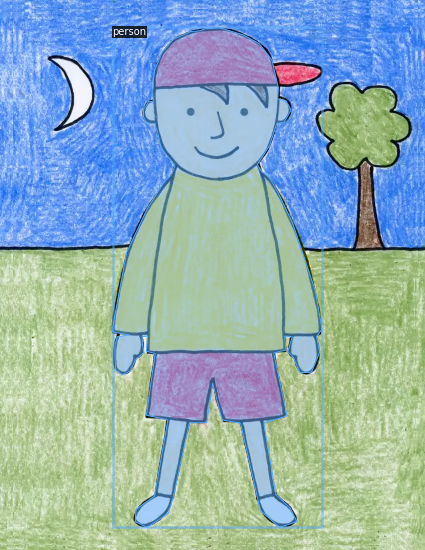

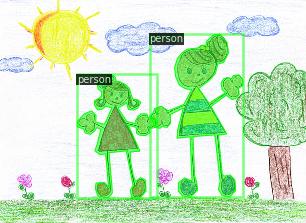

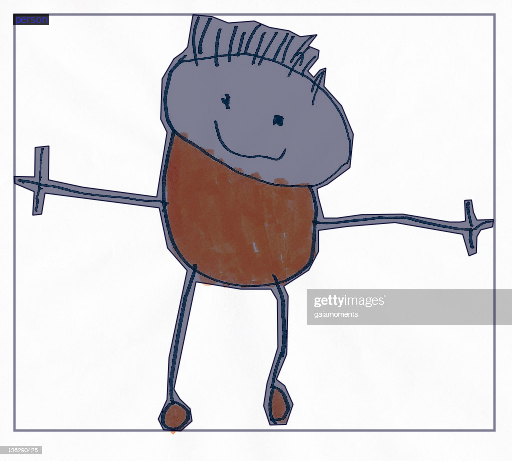

In [ ]:
import random

for d in random.sample(dataset_dicts, 3):

    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=person_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("person",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # 1 classes (person)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[09/07 01:04:35 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:03, 53.5MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/07 01:04:44 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/07 01:05:00 d2.utils.events]:  eta: 0:02:00  iter: 19  total_loss: 1.618  loss_cls: 0.4154  loss_box_reg: 0.6944  loss_mask: 0.5401  loss_rpn_cls: 0.005322  loss_rpn_loc: 0.01107  time: 0.4240  data_time: 0.0198  lr: 0.0012854  max_mem: 2445M
[09/07 01:05:09 d2.utils.events]:  eta: 0:01:49  iter: 39  total_loss: 0.6717  loss_cls: 0.1175  loss_box_reg: 0.3873  loss_mask: 0.1441  loss_rpn_cls: 0.002009  loss_rpn_loc: 0.007603  time: 0.4172  data_time: 0.0112  lr: 0.0026174  max_mem: 2496M
[09/07 01:05:17 d2.utils.events]:  eta: 0:01:39  iter: 59  total_loss: 0.3217  loss_cls: 0.03941  loss_box_reg: 0.1845  loss_mask: 0.09616  loss_rpn_cls: 0.0002587  loss_rpn_loc: 0.004676  time: 0.4165  data_time: 0.0149  lr: 0.0039494  max_mem: 2496M
[09/07 01:05:26 d2.utils.events]:  eta: 0:01:31  iter: 79  total_loss: 0.2491  loss_cls: 0.03642  loss_box_reg: 0.13  loss_mask: 0.07826  loss_rpn_cls: 0.0004233  loss_rpn_loc: 0.004634  time: 0.4173  data_time: 0.0115  lr: 0.0052814  max_mem: 2496M
[0

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("person",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # 1 classes (person)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/detectron2/output/model_final.pth" # 여기부분은 본인의 model이저장된 경로로 수정해줍니다.
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("person", )
predictor = DefaultPredictor(cfg)

[09/07 01:07:16 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

In [1]:
path = "/content/drive/My Drive/detectron2/data/images_test/test1.jpg"

im = cv2.imread(path)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

NameError: ignored